In [159]:
import pandas as pd													# data manipulation
import matplotlib.pyplot as plt												# graphs
import seaborn as sns													# graphs
import numpy as np													# graphs
from scipy.stats import norm												# statistics
from sklearn.preprocessing import StandardScaler									# statistics
from scipy import stats													# statistics
from math import *													# advance calculation	
from matplotlib import cm												# graphs
import sys														# system functions
import warnings														# indicating warnings
warnings.filterwarnings('ignore')											# ignore by default
from matplotlib.ticker import LinearLocator										# graphs
pd.set_option('display.max_columns', None)										# show all columns
pd.set_option('display.max_rows', None)											# show all rows
np.set_printoptions(threshold=sys.maxsize)										# show arrays full
pd.set_option("display.max_colwidth", -1)										# show a complete text in a cell
from xlsxwriter.workbook import Workbook										# CSV writing
import csv														# CSV writing	
import xgboost as xgb													# prediction
import pickle														# prediction	
import sklearn														# mutual information
import statsmodels.api as sm												# coefficient
from sklearn.ensemble import RandomForestClassifier									# random forest
from sklearn import linear_model											# linear regression
import pymysql														# MySql connection
import datetime														# time conversions
import random														# randomchoice

1- what does the product-reviewer graph look like?

2- what words tend to indicate positive and negative reviews?

3- what types of food products get reviewed the most?

4- how does review score distribution vary across reviewers?

5- what makes a review helpful?

In [181]:
df = pd.read_csv('Amazon Product Reviews.csv')

In [182]:
df = df.drop(columns=['Id'])
df['UserReviewSatisfaction%'] = round((df['HelpfulnessNumerator'] / df['HelpfulnessDenominator'])*100, 0)
df['Time'] = pd.to_datetime(df['Time'], unit='s')
df = df.sort_values('Time')

# Drop duplicates
dfdup = df.duplicated(subset=['Text'])
indexlist = [i for i in dfdup.index if dfdup[i] == True]
df.drop(indexlist , inplace=True)

In [186]:
# Question1/3

dfresult = pd.DataFrame(data={'ProductId':[''],'UserSatisfaction%':[''],'ReviewCounts':['']},
columns=['ProductId','UserSatisfaction%','ReviewCounts'])

index=0
for ProductId in df['ProductId'].sample(500).unique():
    if df.loc[df['ProductId'] == ProductId]['Score'].count() > 100:
        dfresult.at[index, 'ProductId'] = ProductId
        dfresult.at[index, 'UserSatisfaction%'] = round(df.loc[df['ProductId'] == ProductId]['Score'].mean()*20,2)
        dfresult.at[index, 'ReviewCounts'] = df.loc[df['ProductId'] == ProductId]['Score'].count()
        
        index= index+1
        
dfresult = dfresult.sort_values('UserSatisfaction%', ascending=False)
dfresult

,ProductId,UserSatisfaction%,ReviewCounts
22,B000NMJWZO,97.64,542
35,B000DZDJ0K,96.52,138
43,B000GAT6NG,95.54,130
12,B001EQ5JLE,95.09,212
23,B001EO5Q64,94.94,565
41,B003B3OOPA,94.82,622
6,B000V17MLS,94.08,223
31,B000XEV9YE,93.08,104
17,B007JFMH8M,91.62,909
19,B000FL08B0,91.57,140


B000NMJWZO :



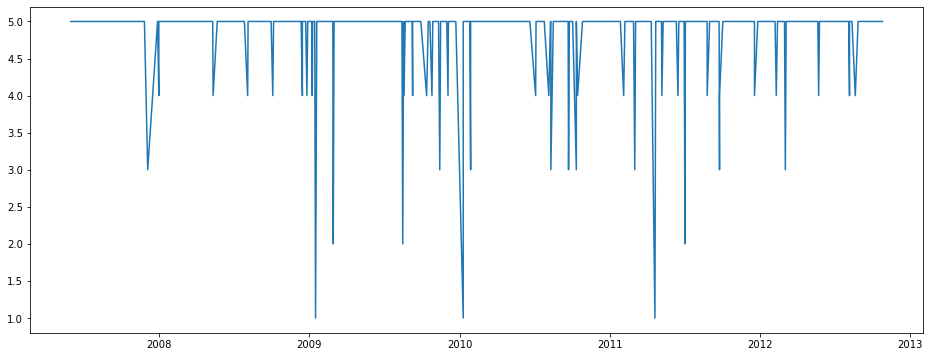

B000DZDJ0K :



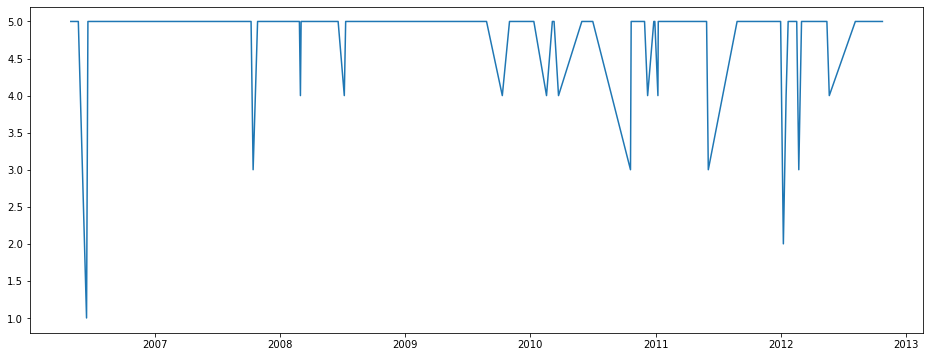

B000GAT6NG :



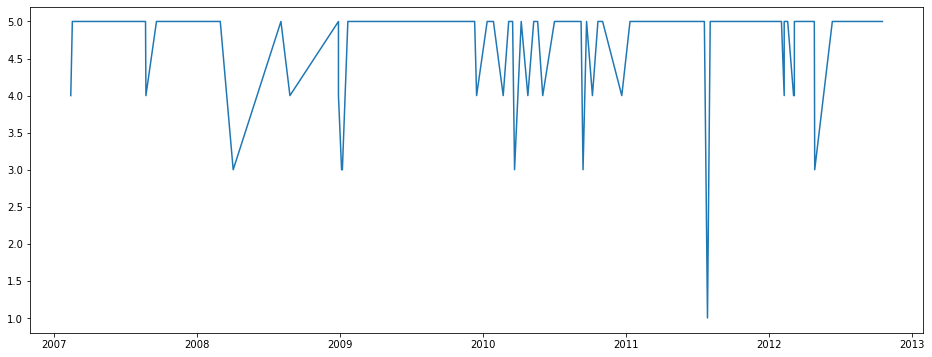

B001EQ5JLE :



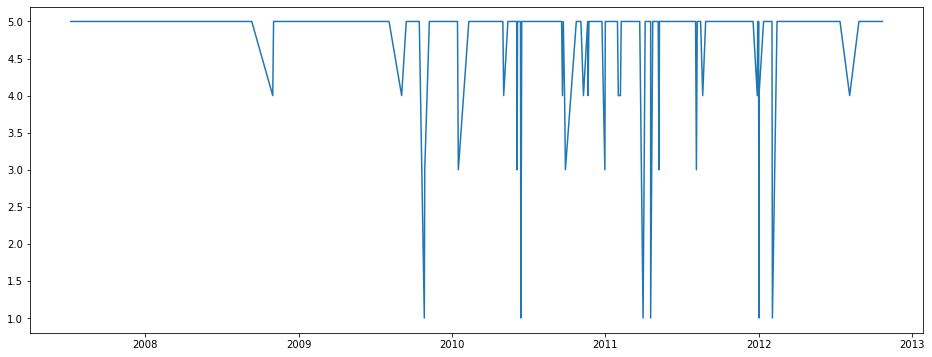

B001EO5Q64 :



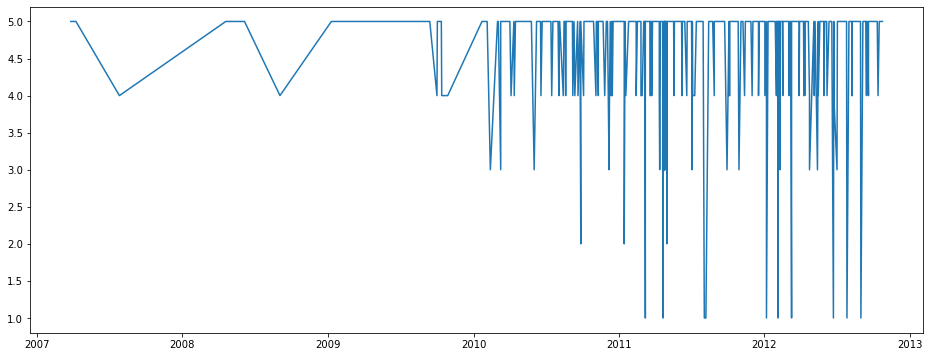

B003B3OOPA :



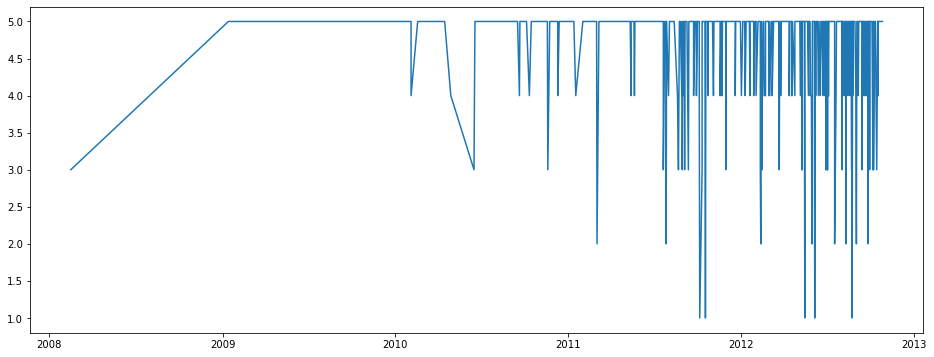

B000V17MLS :



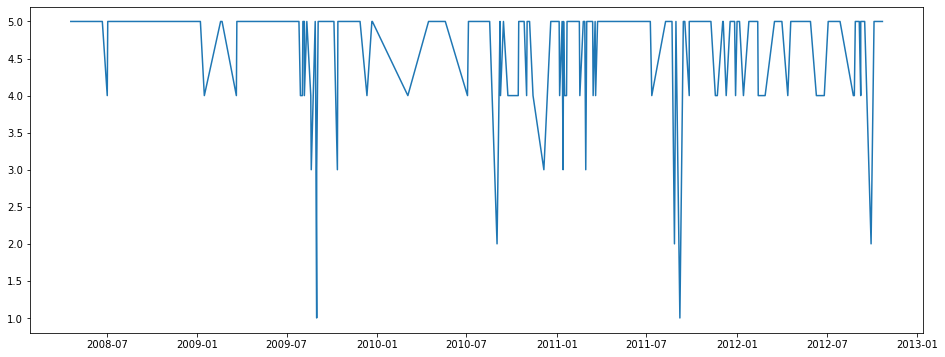

B000XEV9YE :



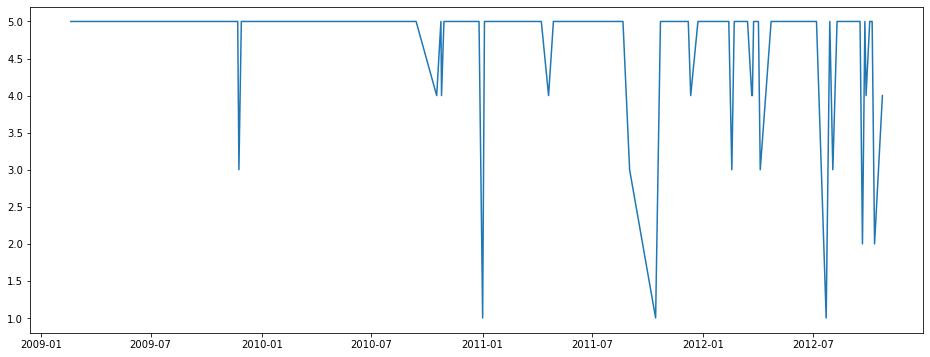

B007JFMH8M :



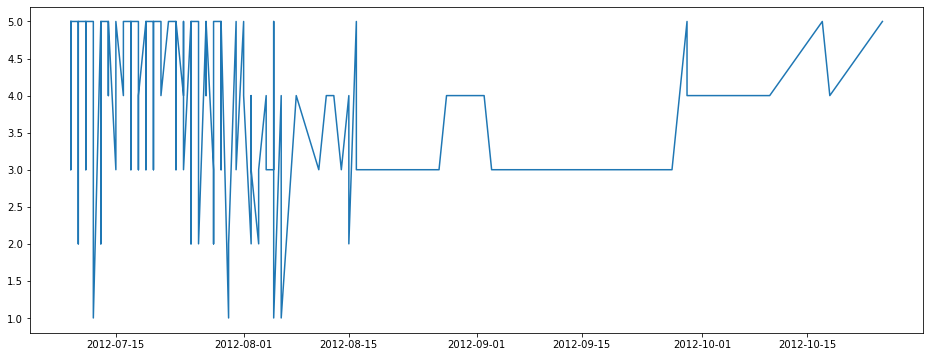

B000FL08B0 :



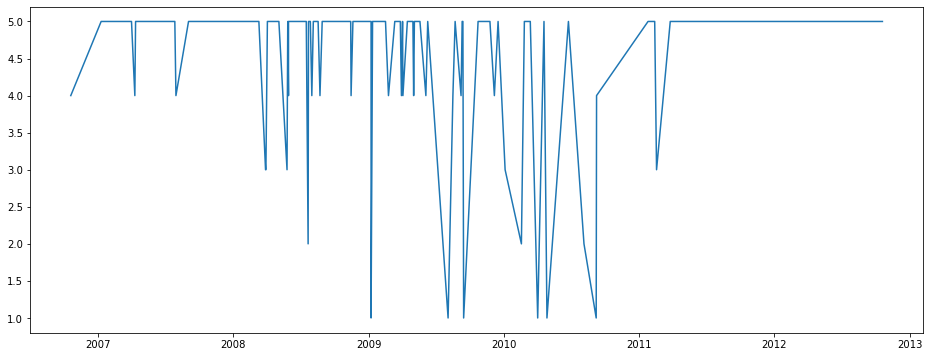

B001E5E0Y2 :



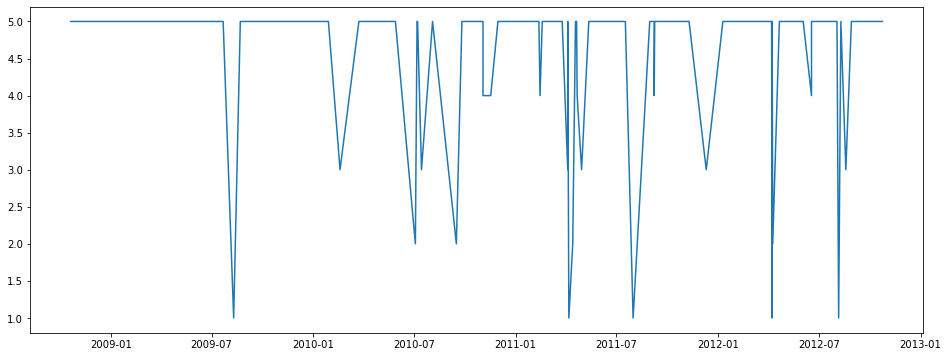

B000HDK0D2 :



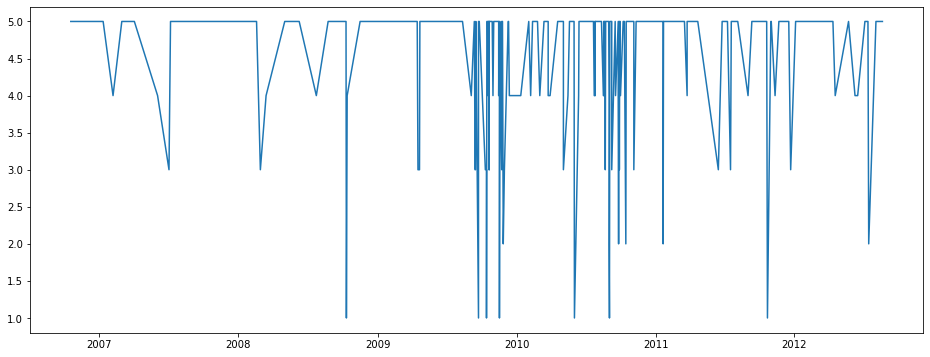

B002GJ9JWS :



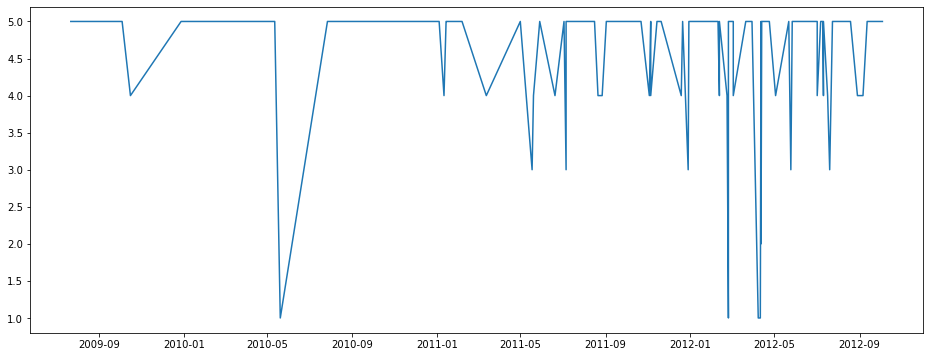

B000EDG3UE :



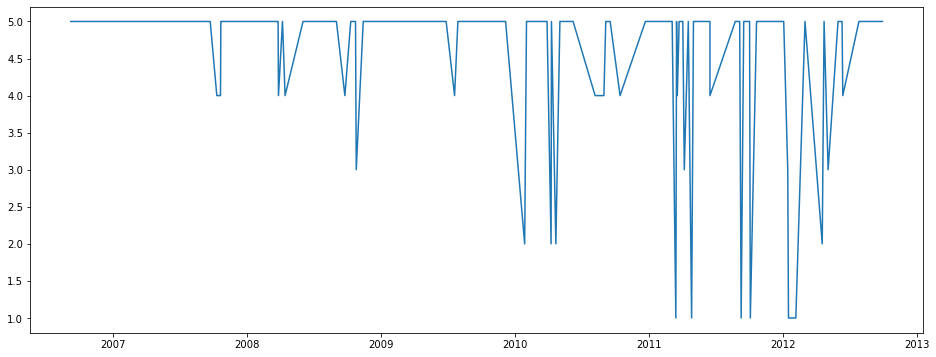

B000VK08OC :



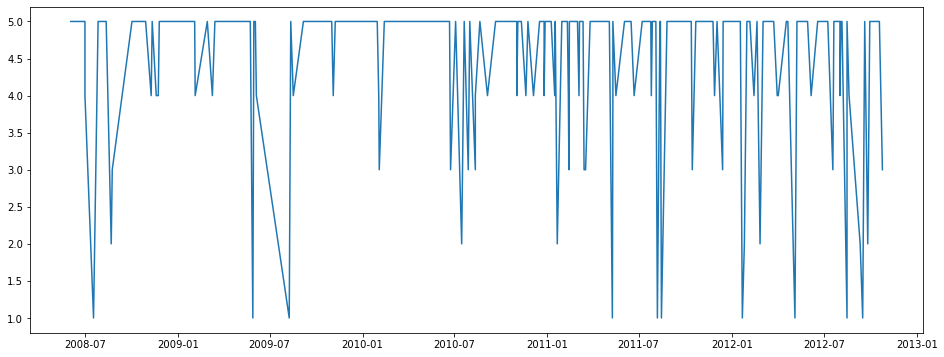

B001P74NXM :



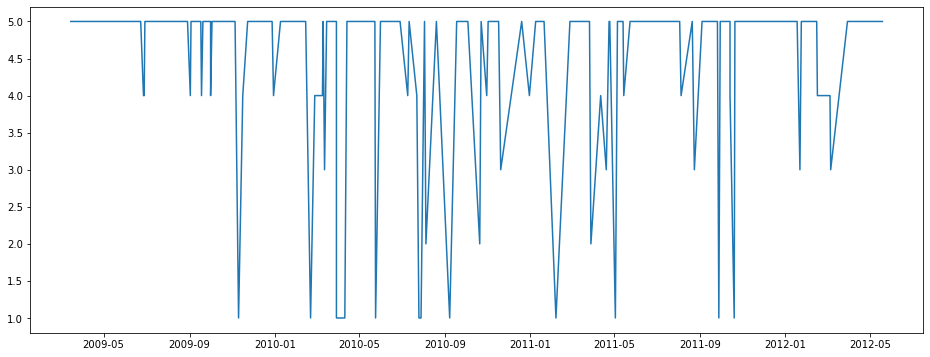

B006H34CUS :



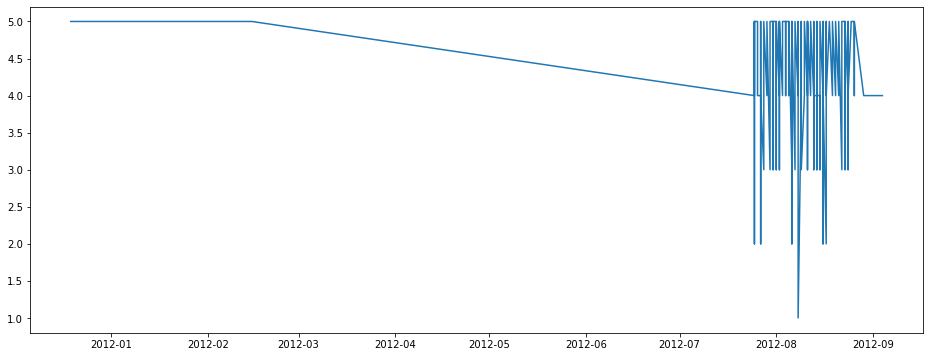

B002OL2MWM :



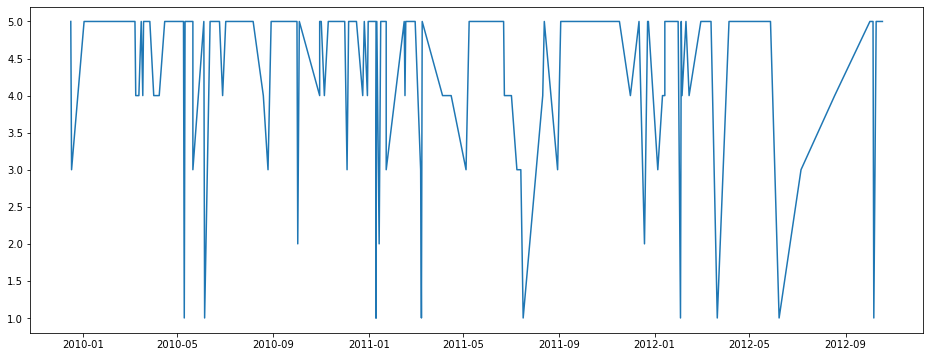

B000LQORDE :



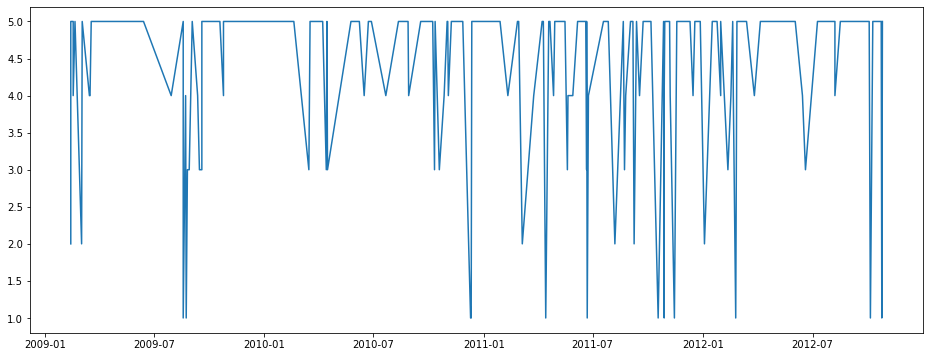

B0009F3POY :



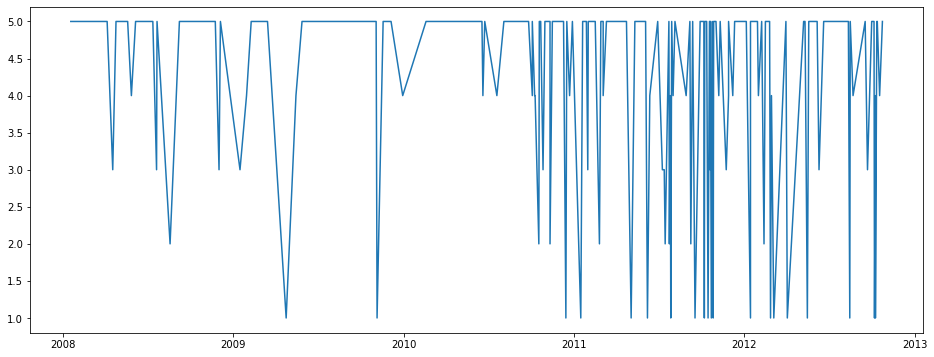

B001OCKIP0 :



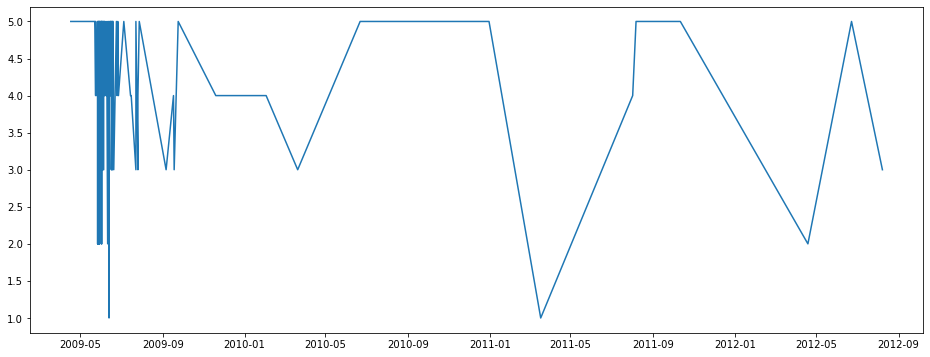

B0014X5O1C :



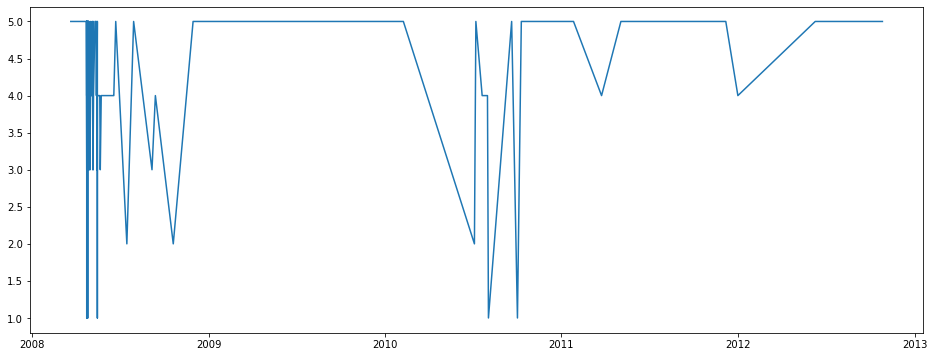

B002TN49F8 :



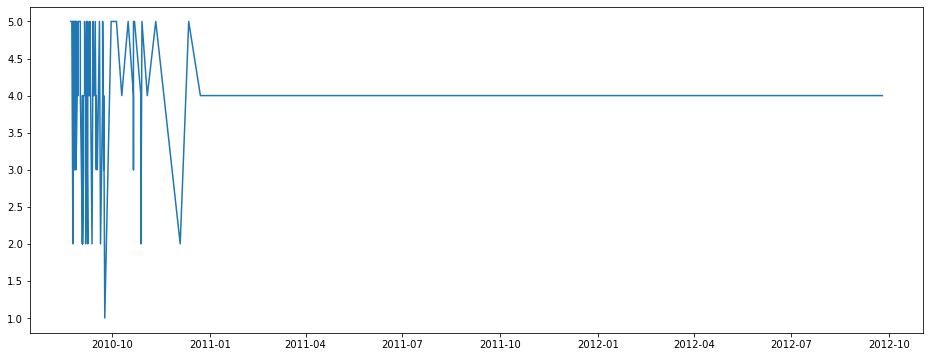

B00503DOWS :



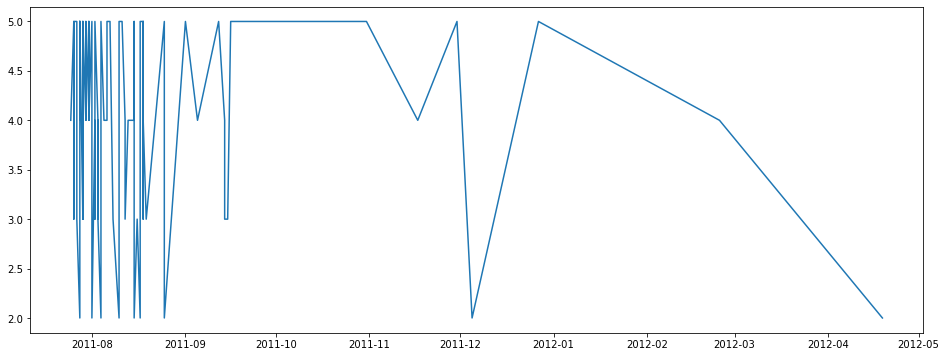

B003EML8PM :



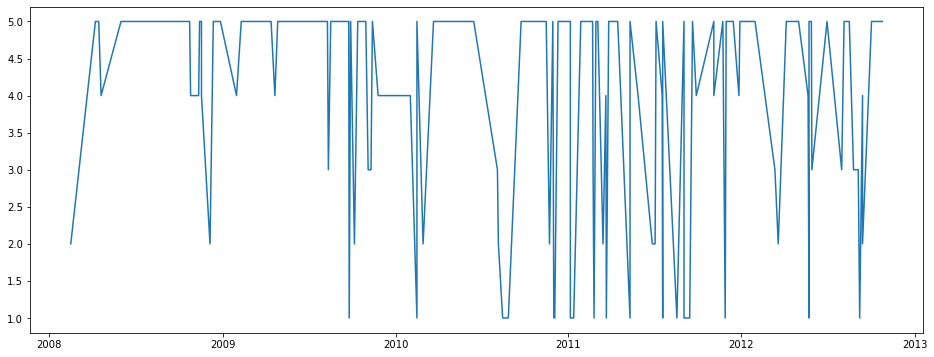

B004TPKAN4 :



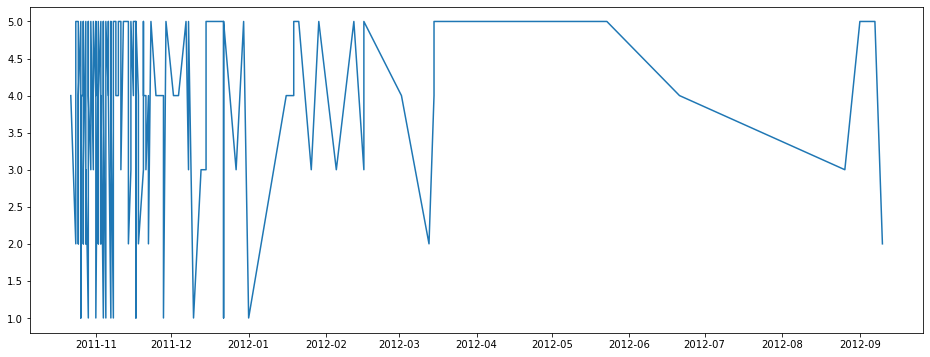

B005ZBZLPI :



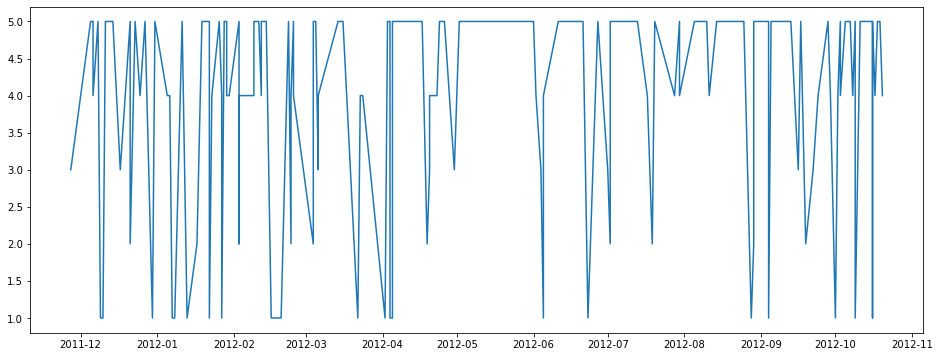

B0008IT4OM :



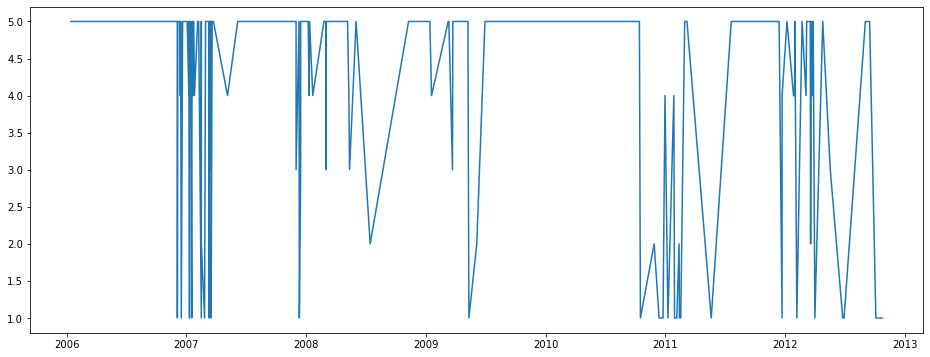

B005A1LINC :



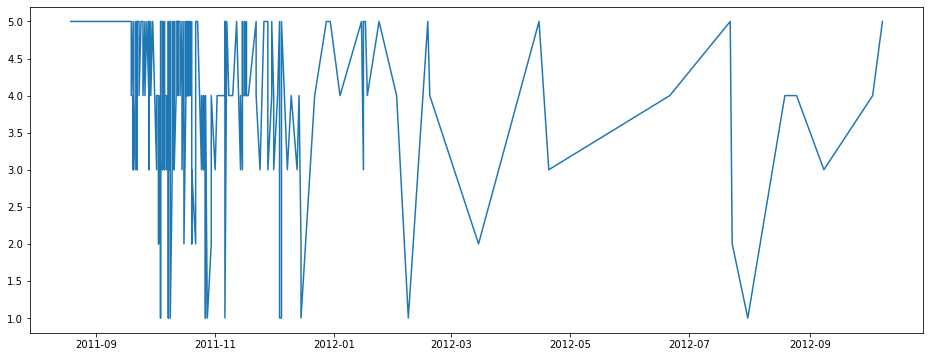

B000FI4O90 :



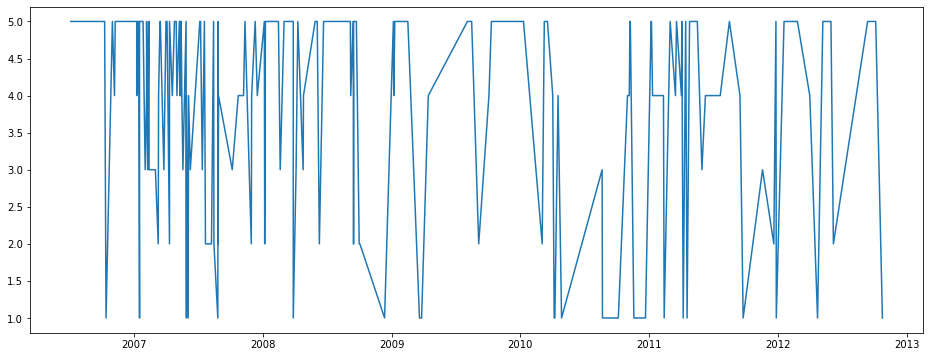

B002IEVJRY :



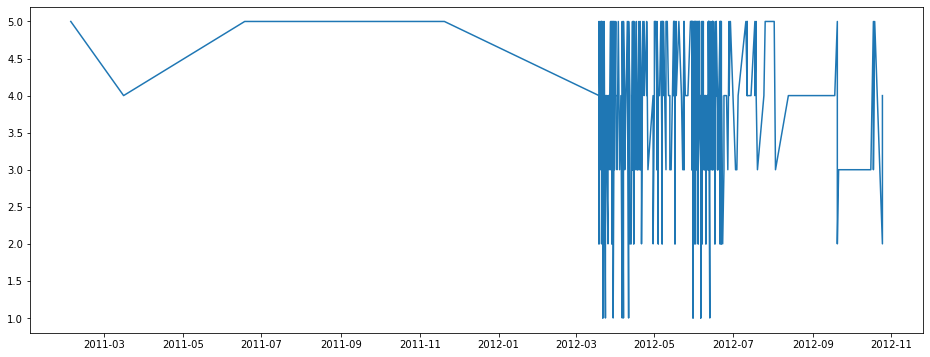

B002LANN56 :



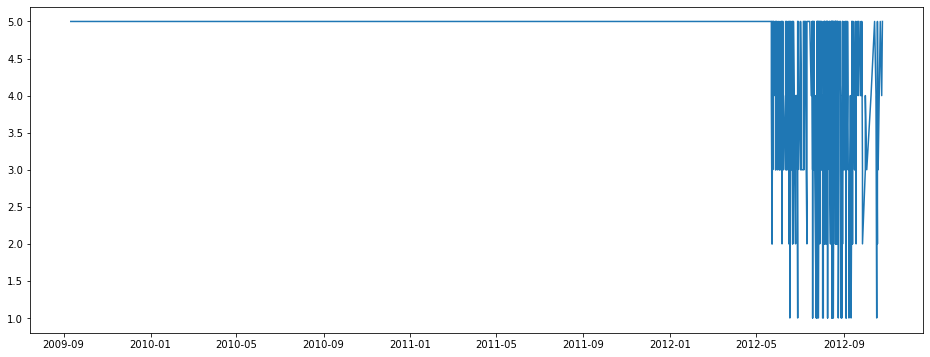

B004WTHCO2 :



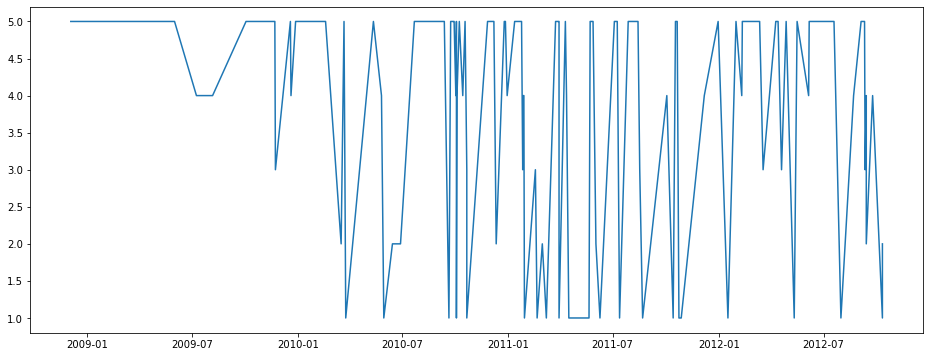

B005HGAV8I :



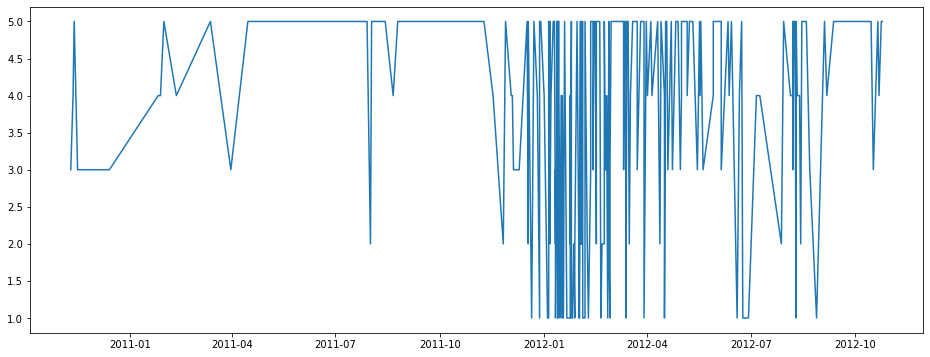

B000UUWECC :



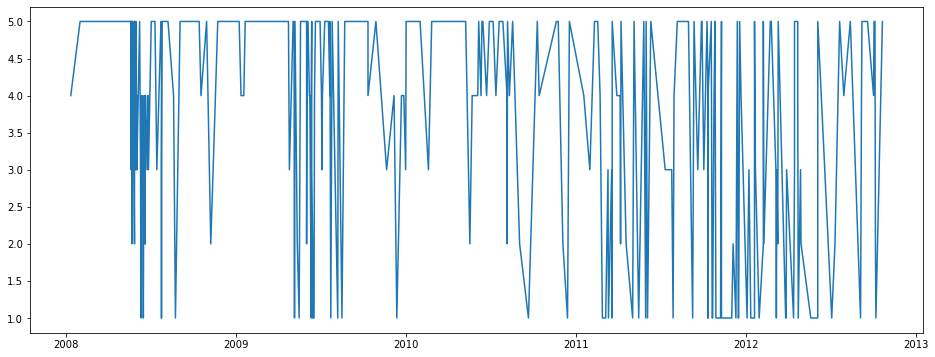

B001189I3A :



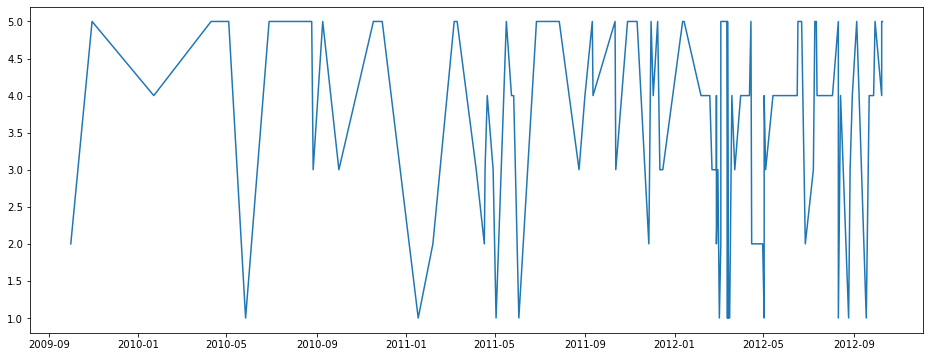

B004MO6NI8 :



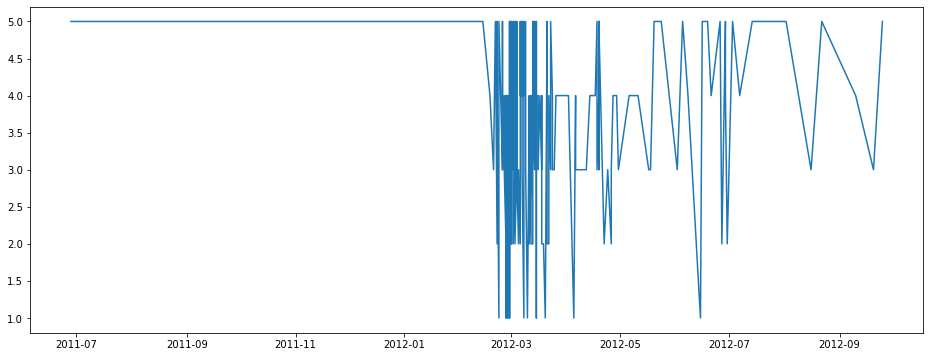

B001LGGH40 :



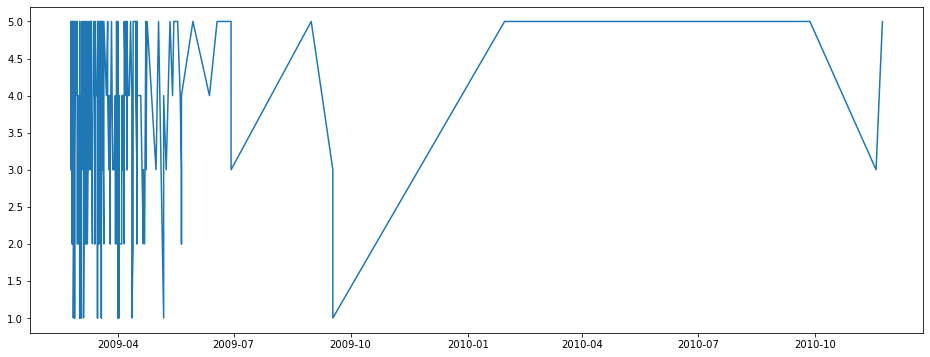

B001EQ55ZO :



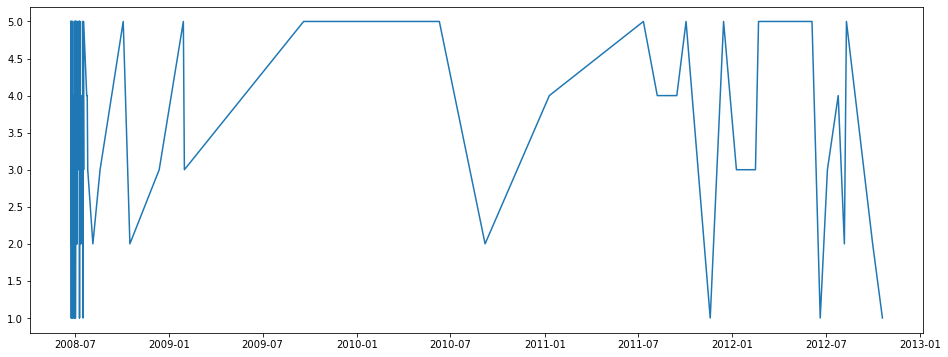

B004ZIER34 :



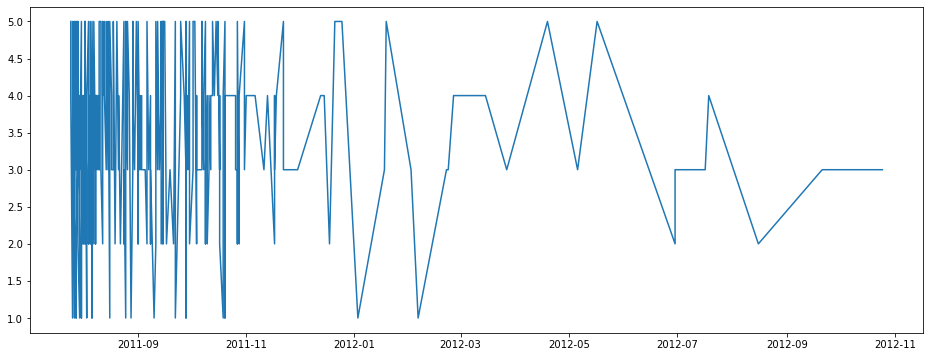

B004YV80OE :



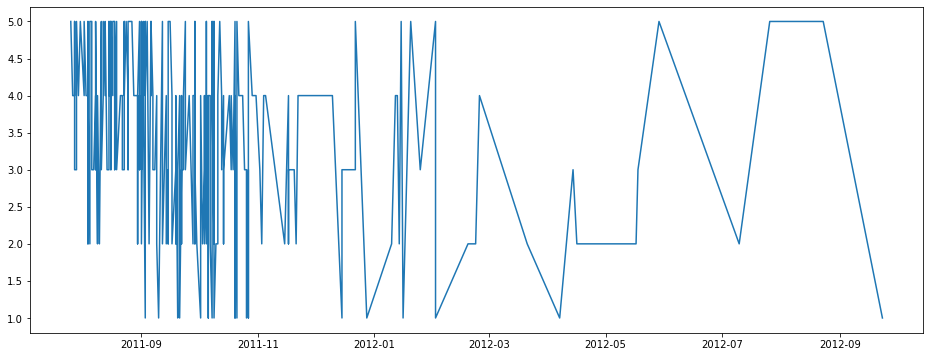

B0016PC4TS :



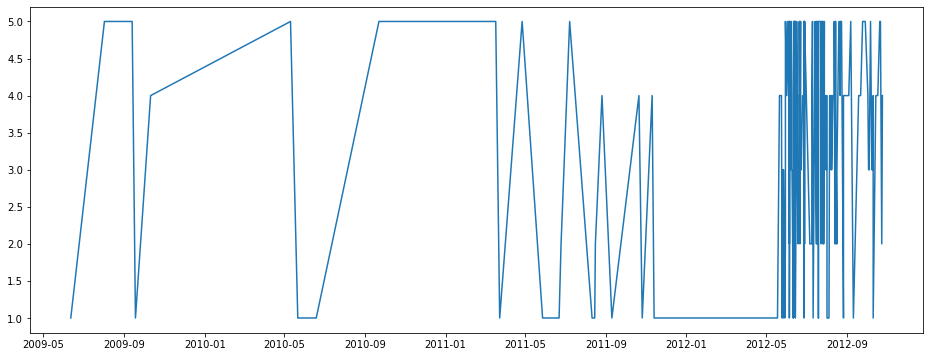

B005A1LJ04 :



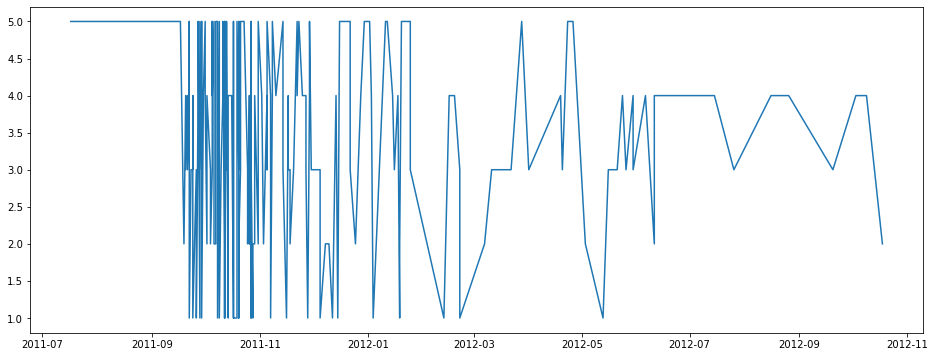

B004U49QU2 :



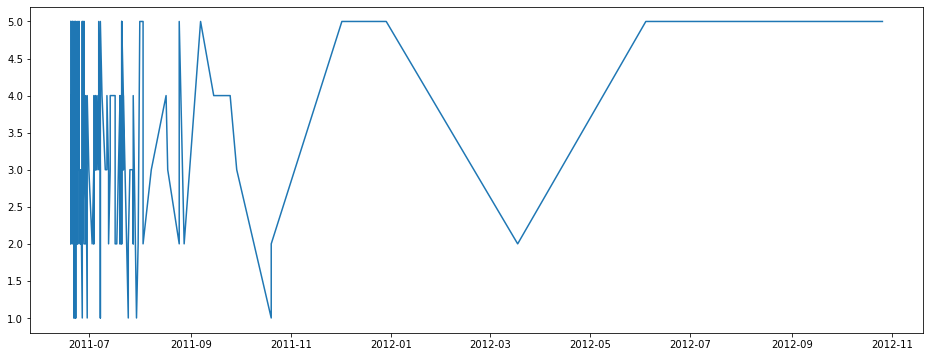

B003YBLF2E :



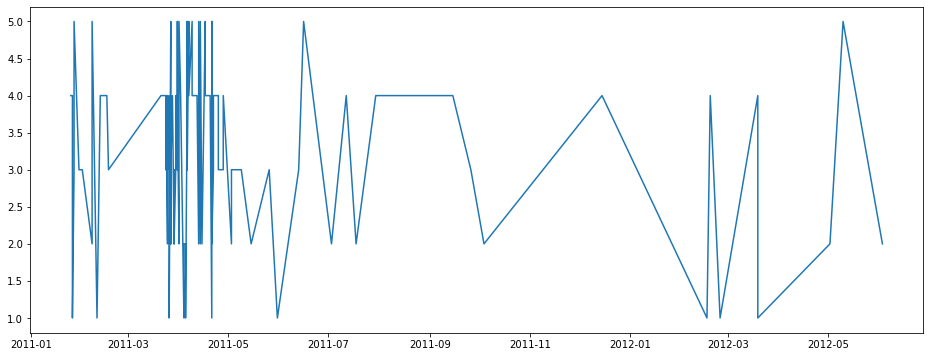

B00271NNLI :



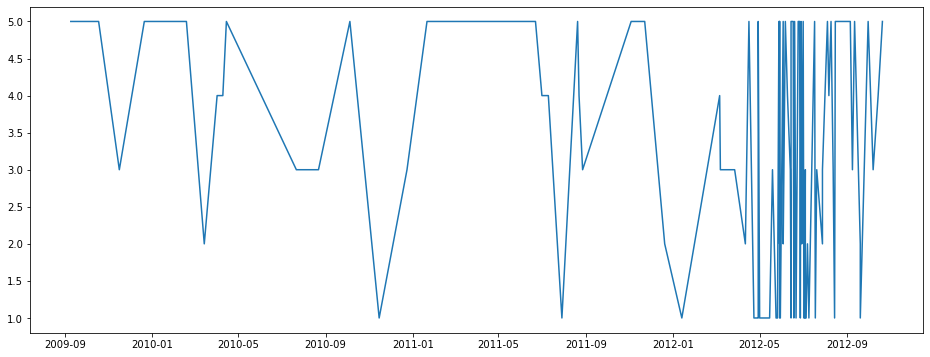

B006BXV176 :



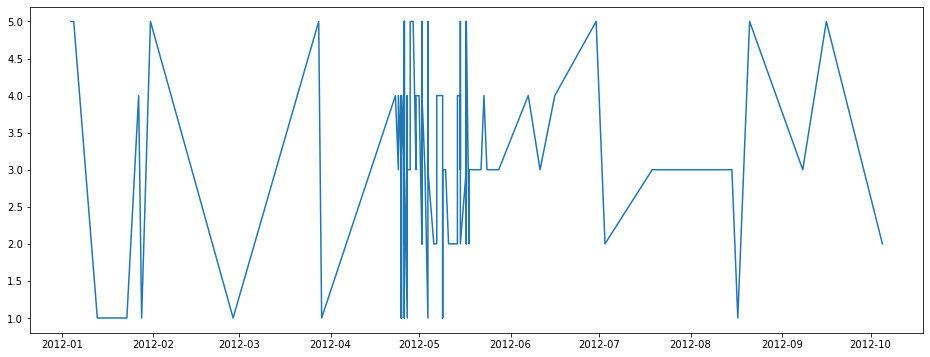

B004OAZ36I :



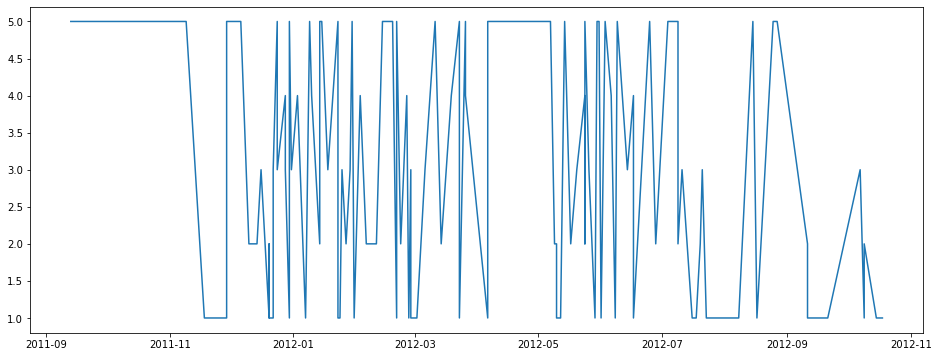

In [187]:
# Time series

for ProductId in dfresult['ProductId'].unique():
    print(ProductId,':\n') 
    fig, ax = plt.subplots(figsize=(16, 6))
    plt.plot(df.loc[df['ProductId'] == ProductId]['Time'] , df.loc[df['ProductId'] == ProductId]['Score']);
    plt.show()

In [201]:
# Question2: Positive reviews contain those words: (but,or,as,so,not,than,the) more logic + higher score was given to the product

dfpositive = df.loc[(df['UserReviewSatisfaction%'] == 100) & (df['HelpfulnessDenominator'] > 50 )]

# split a char and count values
def sm(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(' '):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]
df2 = sm(dfpositive['Text'])
df2.sum().sort_values(ascending=False)

the                                                                 100
and                                                                 99 
a                                                                   96 
to                                                                  91 
of                                                                  90 
is                                                                  89 
I                                                                   88 
for                                                                 86 
this                                                                83 
it                                                                  83 
in                                                                  83 
that                                                                82 
/><br                                                               72 
have                                                            

In [207]:
# Question2: Negative reviews contain those words: (I,not,but,so,as,if)

dfnegative = df.loc[(df['UserReviewSatisfaction%'] == 0) & (df['HelpfulnessDenominator'] > 13 )]

# split a char and count values
def sm(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(' '):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]
df2 = sm(dfnegative['Text'])
df2.sum().sort_values(ascending=False)

I                                                               110
the                                                             109
and                                                             90 
a                                                               89 
to                                                              84 
is                                                              83 
this                                                            82 
of                                                              77 
it                                                              76 
for                                                             72 
                                                                70 
in                                                              68 
not                                                             65 
but                                                             63 
that                                            

In [214]:
# Question4

dfresult2 = pd.DataFrame(data={'UserId':[''],'Score':[''],'ReviewsWritten':[''],'LikedByOthers%':['']},
columns=['UserId','Score','ReviewsWritten','LikedByOthers%'])

index=0
for UserId in df['UserId'].unique()[:15000]:
    if df.loc[df['UserId'] == UserId]['UserId'].count() > 20:
        dfresult2.at[index, 'UserId'] = UserId
        dfresult2.at[index, 'Score'] = round(df.loc[df['UserId'] == UserId]['Score'].mean()*20,2)
        dfresult2.at[index, 'ReviewsWritten'] = df.loc[df['UserId'] == UserId]['Score'].count()
        dfresult2.at[index, 'LikedByOthers%'] = round(df.loc[(df['UserId'] == UserId) & (df['UserReviewSatisfaction%'].notnull()) ]['UserReviewSatisfaction%'].mean(),2)
        
        index= index+1
dfresult2 = dfresult2.sort_values('ReviewsWritten', ascending=False)
dfresult2 = dfresult2.reset_index(drop=True)
dfresult2

,UserId,Score,ReviewsWritten,LikedByOthers%
0,A281NPSIMI1C2R,95.54,242,82.83
1,A1Z54EM24Y40LL,87.68,211,89.22
2,A1YUL9PCJR3JTY,92.16,194,94.39
3,A3D6OI36USYOU1,88.19,144,77.64
4,AKMEY1BSHSDG7,94.92,118,88.93
5,A1IU7S4HCK1XK0,90.36,112,99.15
6,A1WX42M589VAMQ,80.92,109,89.69
7,A3F3B1JPACN215,84.81,108,82.01
8,AY1EF0GOH80EK,82.06,107,84.71
9,A2R6RA8FRBS608,93.4,103,78.73


In [225]:
print('Professional Reviewrs achieved:',round(dfresult2['LikedByOthers%'].head(100).mean(),1),'% likes, scores:',round(dfresult2['Score'].head(100).mean(),1))
print('Beginner     Reviewrs achieved:',round(dfresult2['LikedByOthers%'].tail(100).mean(),1),'% likes, scores:',round(dfresult2['Score'].tail(100).mean(),1))

Professional Reviewrs achieved: 78.8 % likes, scores: 83.6
Beginner     Reviewrs achieved: 75.1 % likes, scores: 83.0
